In [17]:
%matplotlib inline
import os
import sys
from matplotlib import *
from pylab import *

In [18]:
def get_underscore_locations(file):
    underscore_locations = [index for index, character in enumerate(file)
                            if character == "_"]
    return underscore_locations

def get_file_contents(file_name):
    file_path = os.path.join(path, file_name)
    with open(file_path, "r") as file:
        file.readline()
        file_contents = file.readlines()
    return file_contents

def get_detuning_and_gamma(file_contents, dataset):
    file_lines_decomposed = [[float(number) for number in line.strip().split('\t')]
                             for line in file_contents]
    output_outliers(file_lines_decomposed, dataset)
    file_lines_decomposed = [i for i in file_lines_decomposed if abs(i[1]) < 200]
    detuning, gamma = zip(*file_lines_decomposed)
    return detuning, gamma

def output_outliers(file_lines_decomposed, dataset):
    for i in file_lines_decomposed:
        if abs(i[1]) >= 200:
            print(i[0], i[1], dataset)

In [19]:
def plot_detuning_vs_gamma(path):
    for file_name in sorted(os.listdir(path)):
        file_contents = get_file_contents(file_name)
        data_set = file_name[18:]
        detuning, gamma = get_detuning_and_gamma(file_contents, data_set)
        plt.plot(detuning, gamma, label = data_set)
    return plt

def add_plot_labels(plt):
    plt.legend(loc="upper right")
    plt.xlabel("My x label")
    plt.ylabel("My y label")
    plt.title("My title")
    return plt

228.57532555605903 15112022_26_dBm
-1576.5735318980333 16112022_overnight_26
-5917.864714308088 16112022_overnight_26
217230.23382102454 16112022_overnight_26
4953.184951857974 16112022_overnight_26
-541.6898519675592 16112022_overnight_26
-180124.38569536468 16112022_overnight_27
12082.824430144561 16112022_overnight_27
-147559.73843555024 16112022_overnight_27
-4361.575640694461 16112022_overnight_27
21947.011411234733 16112022_overnight_27
181699.58970025135 16112022_overnight_27
-9235.261829173985 16112022_overnight_27
143787.4698567382 16112022_overnight_27


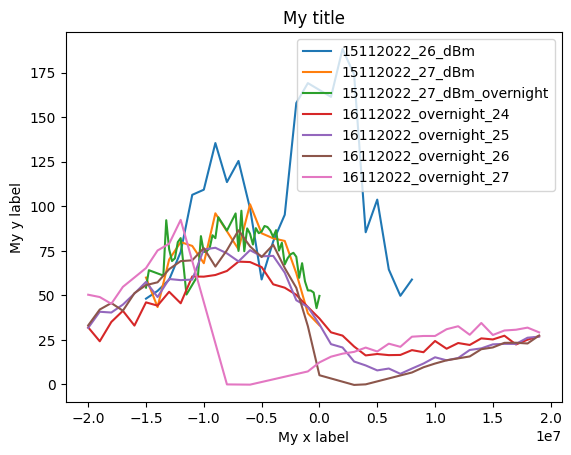

In [20]:
parent_folder = os.path.dirname(sys.path[0])
path = os.path.join(parent_folder, "Gamma Results")
plt = plot_detuning_vs_gamma(path)
plt = add_plot_labels(plt)